<a href="https://colab.research.google.com/github/sumanthvasista107/Fashion_Recommendation_using_deep_learning/blob/main/Final_Fashion_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

!pip install kaggle

In [ ]:
!pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download paramaggarwal/fashion-product-images-small

 97% 549M/565M [00:02<00:00, 255MB/s]
100% 565M/565M [00:02<00:00, 249MB/s]


In [ ]:
#! kaggle datasets download paramaggarwal/fashion-product-images-dataset

In [ ]:
import shutil

shutil.rmtree('/content/images')

In [ ]:
!unzip /content/fashion-product-images-small.zip

Streaming output truncated to the last 5000 lines.
  inflating: myntradataset/images/58131.jpg  
  inflating: myntradataset/images/58132.jpg  
  inflating: myntradataset/images/58133.jpg  
  inflating: myntradataset/images/58135.jpg  
  inflating: myntradataset/images/58136.jpg  
  inflating: myntradataset/images/58137.jpg  
  inflating: myntradataset/images/58138.jpg  
  inflating: myntradataset/images/58139.jpg  
  inflating: myntradataset/images/5814.jpg  
  inflating: myntradataset/images/58140.jpg  
  inflating: myntradataset/images/58141.jpg  
  inflating: myntradataset/images/58143.jpg  
  inflating: myntradataset/images/58144.jpg  
  inflating: myntradataset/images/58145.jpg  
  inflating: myntradataset/images/58146.jpg  
  inflating: myntradataset/images/58147.jpg  
  inflating: myntradataset/images/58148.jpg  
  inflating: myntradataset/images/58149.jpg  
  inflating: myntradataset/images/5815.jpg  
  inflating: myntradataset/images/58150.jpg  
  inflating: myntradataset/imag

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import tensorflow.keras as keras
from keras import Model
from keras.applications.densenet import DenseNet121
from keras.applications import vgg16
import keras.utils as image
from keras.applications.densenet import preprocess_input, decode_predictions
from keras.layers import GlobalMaxPooling2D
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pathlib
from sklearn.metrics.pairwise import linear_kernel
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GlobalMaxPooling1D, Concatenate, Flatten
from keras.utils import to_categorical

In [ ]:
path = '/content/myntradataset'
dataset_path = pathlib.Path(path)
dirs_names = os.listdir(dataset_path) # list content of dataset
dirs_names

['images', 'styles.csv']

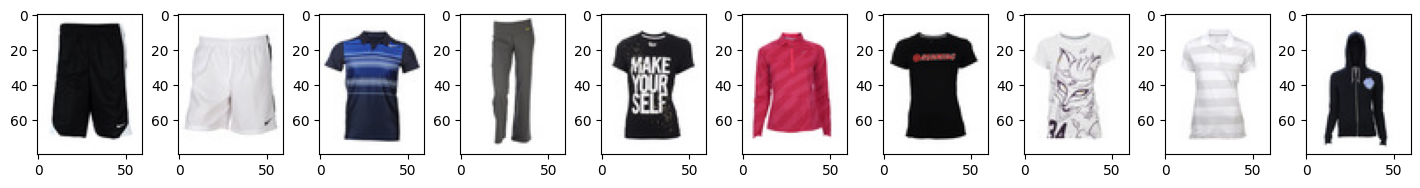

In [ ]:
# Plot samples
plt.figure(figsize=(20,20))
for i in range(20,30):
    plt.subplot(6, 10, i-10+1)
    cloth_img =  mpimg.imread(path + '/images/100' + str(i) +'.jpg') # Assign images ids
    plt.imshow(cloth_img)
plt.subplots_adjust(wspace=-0.5, hspace=1)
plt.show()

In [ ]:
#1000 images selected

styles_df_1000 = pd.read_csv(path + "/styles.csv", nrows=1000, error_bad_lines=False) # Read 2000 product and drop bad lines
styles_df_1000['image'] = styles_df_1000.apply(lambda x: str(x['id']) + ".jpg", axis=1) # Make image column contains (id.jpg)

#2000 images selected
styles_df_2000 = pd.read_csv(path + "/styles.csv", nrows=1000, error_bad_lines=False) # Read 2000 product and drop bad lines
styles_df_2000['image'] = styles_df_2000.apply(lambda x: str(x['id']) + ".jpg", axis=1)

#3000 images selected
styles_df_3000 = pd.read_csv(path + "/styles.csv", nrows=1000, error_bad_lines=False) # Read 2000 product and drop bad lines
styles_df_3000['image'] = styles_df_3000.apply(lambda x: str(x['id']) + ".jpg", axis=1)


#5000 images selected
styles_df_5000 = pd.read_csv(path + "/styles.csv", nrows=1000, error_bad_lines=False) # Read 2000 product and drop bad lines
styles_df_5000['image'] = styles_df_5000.apply(lambda x: str(x['id']) + ".jpg", axis=1)


<ipython-input-116-a8f3988ef1b2>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  styles_df_1000 = pd.read_csv(path + "/styles.csv", nrows=1000, error_bad_lines=False) # Read 2000 product and drop bad lines
<ipython-input-116-a8f3988ef1b2>:7: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  styles_df_2000 = pd.read_csv(path + "/styles.csv", nrows=1000, error_bad_lines=False) # Read 2000 product and drop bad lines
<ipython-input-116-a8f3988ef1b2>:11: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  styles_df_3000 = pd.read_csv(path + "/styles.csv", nrows=1000, error_bad_lines=False) # Read 2000 product and drop bad lines
<ipython-input-116-a8f3988ef1b2>:16: FutureWarning: The error_bad_lines argument has been dep

<Axes: >

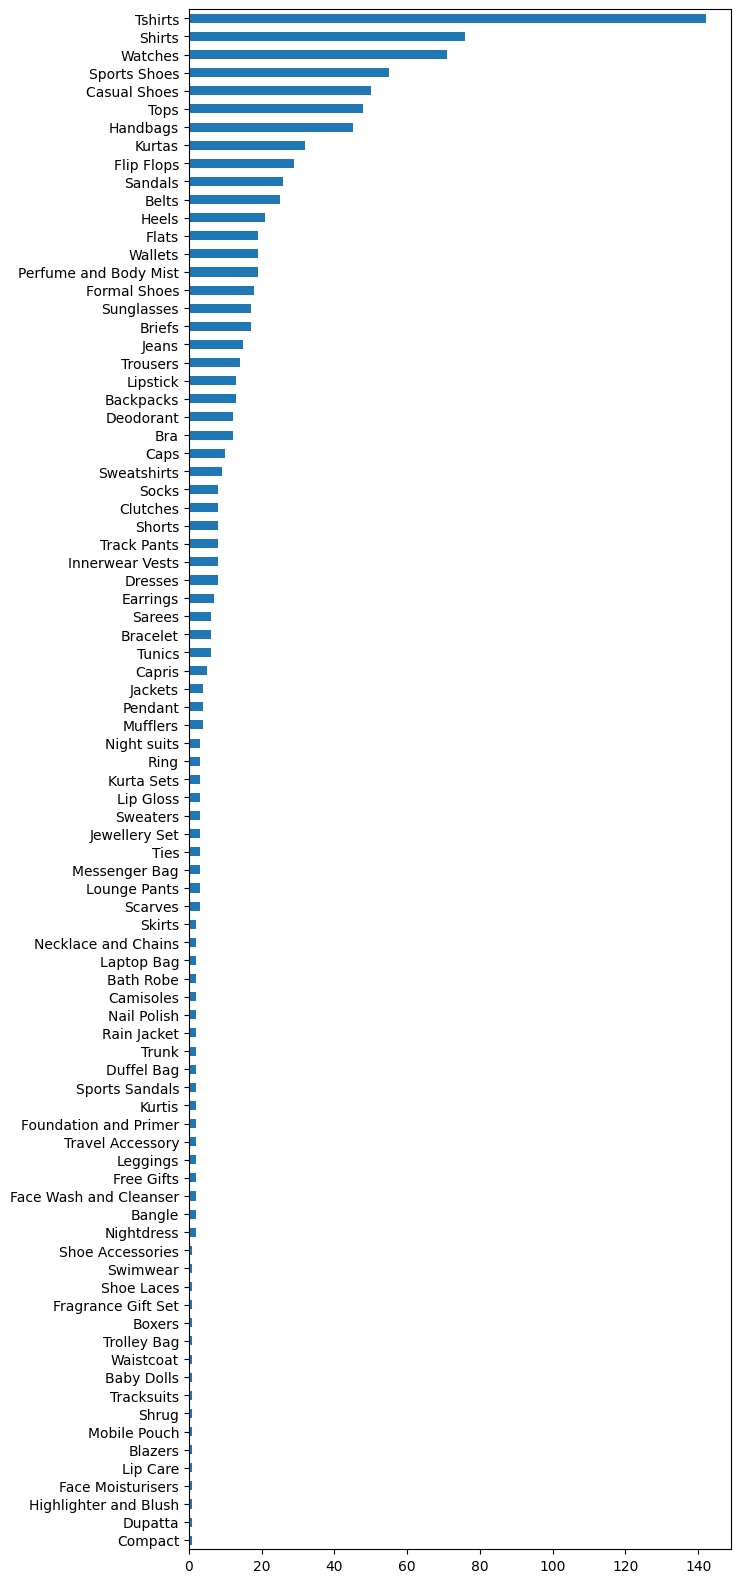

In [ ]:
plt.figure(figsize=(7,20))
styles_df_5000.articleType.value_counts().sort_values().plot(kind='barh')

In [ ]:
img_width, img_height, chnls = 200, 200, 3

In [ ]:
#VGG16
from tensorflow.keras.applications import VGG16

vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(img_width, img_height, chnls))
vgg16.trainable=False
vgg16_model = keras.Sequential([vgg16, GlobalMaxPooling2D()])
vgg16_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 global_max_pooling2d_7 (Glo  (None, 512)              0         
 balMaxPooling2D)                                                
                                                                 
Total params: 14,714,688
Trainable params: 0
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
def img_path(img):
    """ Take image name(id) and return the complete path of it """
    return path + '/images/' + img

def predict(model, img_name):
    """ Load and preprocess image then make prediction """
    # Reshape
    img = image.load_img(img_path(img_name), target_size=(img_width, img_height))
    # img to Array
    img = image.img_to_array(img)
    # Expand Dim (1, w, h)
    img = np.expand_dims(img, axis=0)
    # Pre process Input
    img = preprocess_input(img)
    return model.predict(img)


In [ ]:
#getting feature embeddings for 1000 images
def get_embeddings(df, model):
    """ Return a dataframe contains images features """
    df_copy = df
    df_embeddings = df_copy['image'].apply(lambda x: predict(vgg16_model, x).reshape(-1))
    df_embeddings = df_embeddings.apply(pd.Series)
    return df_embeddings

df_embeddings_1000 = get_embeddings(styles_df_1000, vgg16_model)

1/1 [==============================] - 0s 20ms/step


In [ ]:
#getting embeddings for 2000 images
df_embeddings_1000 = get_embeddings(styles_df_2000, vgg16_model)

1/1 [==============================] - 0s 18ms/step


In [ ]:
#getting embedding for 3000 images
df_embeddings_1000 = get_embeddings(styles_df_3000, vgg16_model)

1/1 [==============================] - 0s 18ms/step


In [ ]:
#getting embedding for 5000 images
df_embeddings_1000 = get_embeddings(styles_df_5000, vgg16_model)

1/1 [==============================] - 0s 18ms/step


In [ ]:
df_embeddings_1000

NameError: ignored

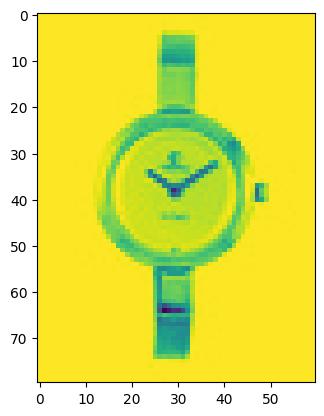

In [ ]:
url="/content/myntradataset/images/59263.jpg"
a = plt.imread(url)
plt.imshow(a)

In [ ]:
sample_image = predict(vgg16_model, '59263.jpg')
sample_image.shape

1/1 [==============================] - 0s 20ms/step


(1, 512)

In [ ]:
df_sample_image = pd.DataFrame(sample_image)
print(df_sample_image)

       0    1         2         3         4         5         6        7    \
0  2.38517  0.0  1.618433  2.651848  0.368371  0.854073  2.842784  0.05552   

   8         9    ...       502       503       504  505  506       507  \
0  0.0  1.645046  ...  1.648798  0.626699  0.642798  0.0  0.0  1.018214   

        508  509       510  511  
0  0.496337  0.0  0.984315  0.0  

[1 rows x 512 columns]


In [ ]:
sample_similarity_1000 = linear_kernel(df_sample_image, df_embeddings_1000)
print(sample_similarity_1000)

NameError: ignored

In [ ]:
sample_similarity_2000 = linear_kernel(df_sample_image, df_embeddings_2000)
print(sample_similarity_2000)

In [ ]:
sample_similarity_3000 = linear_kernel(df_sample_image, df_embeddings_3000)
print(sample_similarity_3000)

In [ ]:
sample_similarity_5000 = linear_kernel(df_sample_image, df_embeddings_5000)
print(sample_similarity_5000)

In [ ]:
def get_similarity(model):
    """ Get similarity of custom image """
    sample_image = predict(vgg16_model, '1165.jpg')
    df_sample_image = pd.DataFrame(sample_image)
    sample_similarity = linear_kernel(df_sample_image, df_embeddings_1000)
    return sample_similarity
sample_similarity_1000

array([[650.4899 , 572.23315, 919.8148 , 602.89886, 684.505  , 789.237  ,
        640.8634 , 658.67474, 590.97815, 642.63904, 544.2504 , 524.0631 ,
        578.9717 , 639.30115, 571.53424, 682.91705, 610.7017 , 433.20923,
        710.1193 , 661.55273, 777.0595 , 582.8238 , 537.60114, 660.3334 ,
        575.7593 , 514.1149 , 551.30096, 708.3391 , 648.98486, 662.7689 ,
        662.82666, 576.322  , 707.17065, 576.9438 , 517.1546 , 746.3279 ,
        588.19275, 694.15594, 749.62695, 808.2178 , 534.6216 , 586.3677 ,
        879.2571 , 595.82764, 678.9245 , 639.284  , 639.4951 , 506.7103 ,
        682.93115, 525.29785, 567.8572 , 521.00397, 747.7344 , 767.74585,
        492.46158, 710.7715 , 538.5589 , 610.0659 , 758.583  , 729.0394 ,
        587.98987, 672.523  , 824.937  , 674.1243 , 602.93054, 518.4426 ,
        523.0617 , 618.30707, 649.17487, 586.10016, 535.2207 , 536.0278 ,
        696.3569 , 533.07806, 751.2967 , 678.09   , 524.3334 , 600.5056 ,
        727.9947 , 660.6542 , 606.0202

In [ ]:
def get_similarity(model):
    """ Get similarity of custom image """
    sample_image = predict(vgg16_model, '1165.jpg')
    df_sample_image = pd.DataFrame(sample_image)
    sample_similarity = linear_kernel(df_sample_image, df_embeddings_2000)
    return sample_similarity
sample_similarity_2000

In [ ]:
def get_similarity(model):
    """ Get similarity of custom image """
    sample_image = predict(vgg16_model, '1165.jpg')
    df_sample_image = pd.DataFrame(sample_image)
    sample_similarity = linear_kernel(df_sample_image, df_embeddings_3000)
    return sample_similarity
sample_similarity_3000

In [ ]:
def get_similarity(model):
    """ Get similarity of custom image """
    sample_image = predict(vgg16_model, '1165.jpg')
    df_sample_image = pd.DataFrame(sample_image)
    sample_similarity = linear_kernel(df_sample_image, df_embeddings_5000)
    return sample_similarity
sample_similarity_5000

In [ ]:
def normalize_sim(similarity):
    """ Normalize similarity results """
    x_min = similarity.min(axis=1)
    x_max = similarity.max(axis=1)
    norm = (similarity-x_min)/(x_max-x_min)[:, np.newaxis]
    return norm

sample_similarity_norm1 = normalize_sim(sample_similarity_1000)
sample_similarity_norm2 = normalize_sim(sample_similarity_2000)
sample_similarity_norm3 = normalize_sim(sample_similarity_3000)
sample_similarity_norm5 = normalize_sim(sample_similarity_5000)
sample_similarity_norm1.shape
sample_similarity_norm1

array([[0.49540144, 0.37252942, 0.91827214, 0.42067805, 0.548809  ,
        0.7132501 , 0.48028672, 0.50825256, 0.40196118, 0.48307467,
        0.32859334, 0.29689696, 0.38310966, 0.47783378, 0.37143204,
        0.5463157 , 0.43292943, 0.15424603, 0.5890264 , 0.5127713 ,
        0.69413006, 0.38915792, 0.3181532 , 0.51085675, 0.37806582,
        0.28127718, 0.3396635 , 0.58623123, 0.49303833, 0.51468086,
        0.5147715 , 0.3789494 , 0.58439666, 0.37992564, 0.2860498 ,
        0.64587796, 0.39758778, 0.56396204, 0.65105784, 0.7430521 ,
        0.31347495, 0.39472222, 0.8545919 , 0.40957543, 0.54004693,
        0.47780687, 0.47813833, 0.2696511 , 0.54633784, 0.29883564,
        0.36565864, 0.29209375, 0.6480863 , 0.6795066 , 0.24727897,
        0.59005034, 0.319657  , 0.43193114, 0.6651199 , 0.6187331 ,
        0.39726925, 0.5299959 , 0.7693032 , 0.53251016, 0.4207278 ,
        0.28807217, 0.29532465, 0.44487068, 0.49333665, 0.3943022 ,
        0.31441566, 0.31568283, 0.56741774, 0.31

In [ ]:
def get_recommendations(df, similarity):
    """ Return the top 5 most similar products """
    # Get the pairwsie similarity scores of all clothes with that one (index, value)
    sim_scores = list(enumerate(similarity[0]))

    # Sort the clothes based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 5 most similar clothes
    sim_scores = sim_scores[0:5]
    print(sim_scores)
    # Get the clothes indices
    cloth_indices = [i[0] for i in sim_scores]

    # Return the top 5 most similar products
    return df['image'].iloc[cloth_indices]

[(516, 1.0), (2, 0.91827214), (937, 0.8866011), (881, 0.87214506), (397, 0.8707402)]


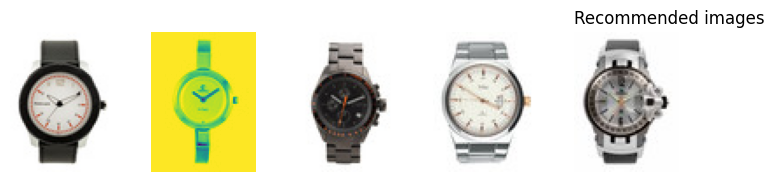

In [ ]:
recommendation = get_recommendations(styles_df_1000, sample_similarity_norm1)
recommendation_list = recommendation.to_list()
#recommended images
plt.figure(figsize=(20,20))
j=0
for i in recommendation_list:
    plt.subplot(6, 10, j+1)
    cloth_img =  mpimg.imread(path + '/images/'+ i)
    plt.imshow(cloth_img)
    plt.axis("off")
    j+=1
plt.title("Recommended images",loc='left')
plt.subplots_adjust(wspace=-0.5, hspace=1)
plt.show()

In [ ]:
styles_df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,0,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,0,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,1,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,59263.jpg
3,21379,0,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,0,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,53759.jpg
...,...,...,...,...,...,...,...,...,...,...,...
995,48911,1,Accessories,Jewellery,Pendant,Silver,Summer,2013,Casual,Lucera Women Silver Pendant with Chain,48911.jpg
996,29926,0,Accessories,Watches,Watches,Black,Winter,2016,Casual,Police Men Black Dial Watch PL12778MSU-61,29926.jpg
997,42417,2,Accessories,Accessories,Messenger Bag,Purple,Summer,2012,Casual,American Tourister Unisex Purple Messenger Bag,42417.jpg
998,3730,0,Apparel,Topwear,Tshirts,Yellow,Summer,2011,Sports,CSK Mens Fangear Yellow Jersey,3730.jpg


In [ ]:
import numpy as np

# Number of items
num_items = len(styles_df['id'])

gender_mapping = {'Men': 0, 'Women': 1, 'Unisex': 2, 'Boys':3, 'Girls':4 }
styles_df['gender'] = [gender_mapping[gender] for gender in styles_df['gender']]

# Initialize an empty ground truth similarity matrix
ground_truth_similarity = np.zeros((num_items, num_items), dtype=int)

# Fill in the ground truth similarity matrix based on the gender attribute
for i in range(num_items):
    for j in range(num_items):
        if styles_df['gender'][i] == styles_df['gender'][j]:
            ground_truth_similarity[i, j] = 1  # Same gender is marked as 1

# Convert the matrix to a flattened array
ground_truth_similarity_flat = ground_truth_similarity.ravel()

# Now you can use ground_truth_similarity_flat for evaluation
ground_truth_similarity_flat.shape

(1000000,)

In [ ]:
all_similarity = linear_kernel(df_embeddings, df_embeddings)
all_similarity_norm = normalize_sim(all_similarity)
all_similarity_norm.shape

(1000, 1000)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Flatten the sample similarity matrix and round similarity scores
sample_similarity_flat = sample_similarity_norm1.ravel().round()

# Calculate accuracy
accuracy_1000 = accuracy_score(ground_truth_similarity_flat, all_similarity_norm.ravel().round())
# Calculate precision
precision_1000 = precision_score(ground_truth_similarity_flat, all_similarity_norm.ravel().round())
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")

# Calculate recall
recall_1000 = recall_score(ground_truth_similarity_flat, all_similarity_norm.ravel().round())
print(f"Recall: {recall:.2f}")

Accuracy: 0.53
Precision: 0.46
Recall: 0.49


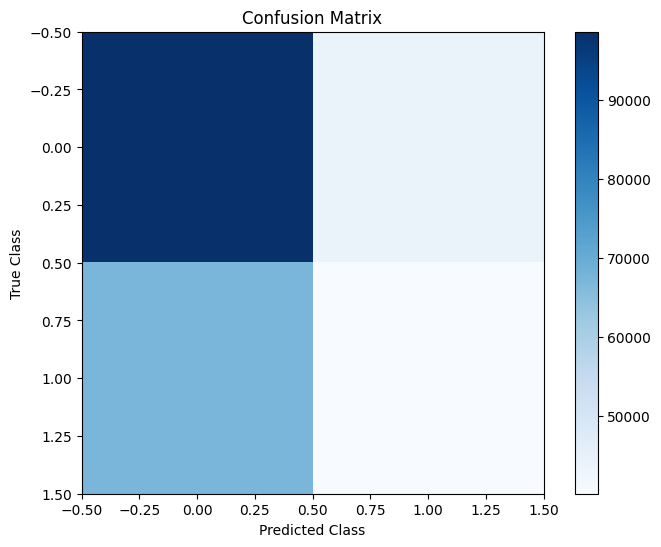

Examples of False Positives:
Predicted: 0.59, Ground Truth: 0
Predicted: 0.57, Ground Truth: 0
Predicted: 0.51, Ground Truth: 0
Predicted: 0.64, Ground Truth: 0
Predicted: 0.72, Ground Truth: 0

Examples of False Negatives:
Predicted: 0.49, Ground Truth: 1
Predicted: 0.40, Ground Truth: 1
Predicted: 0.33, Ground Truth: 1
Predicted: 0.37, Ground Truth: 1
Predicted: 0.34, Ground Truth: 1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(ground_truth_similarity_flat, all_similarity_norm.ravel().round())

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Identify indices of false positives and false negatives
false_positive_indices = np.where((ground_truth_similarity_flat == 0) & (all_similarity_norm.ravel().round() == 1))[0]
false_negative_indices = np.where((ground_truth_similarity_flat == 1) & (all_similarity_norm.ravel().round() == 0))[0]

# Print examples of false positives and false negatives
print("Examples of False Positives:")
for idx in false_positive_indices[:5]:
    print(f"Predicted: {all_similarity_norm.ravel()[idx]:.2f}, Ground Truth: {ground_truth_similarity_flat[idx]}")

print("\nExamples of False Negatives:")
for idx in false_negative_indices[:5]:
    print(f"Predicted: {all_similarity_norm.ravel()[idx]:.2f}, Ground Truth: {ground_truth_similarity_flat[idx]}")

# New research question: Investigate why certain samples are misclassified
# Analyze features, patterns, or characteristics of false positive and false negative cases
# Experiment with different threshold values and observe the effect on precision and recall
# Consider exploring additional metrics or fine-tuning the model for better performance


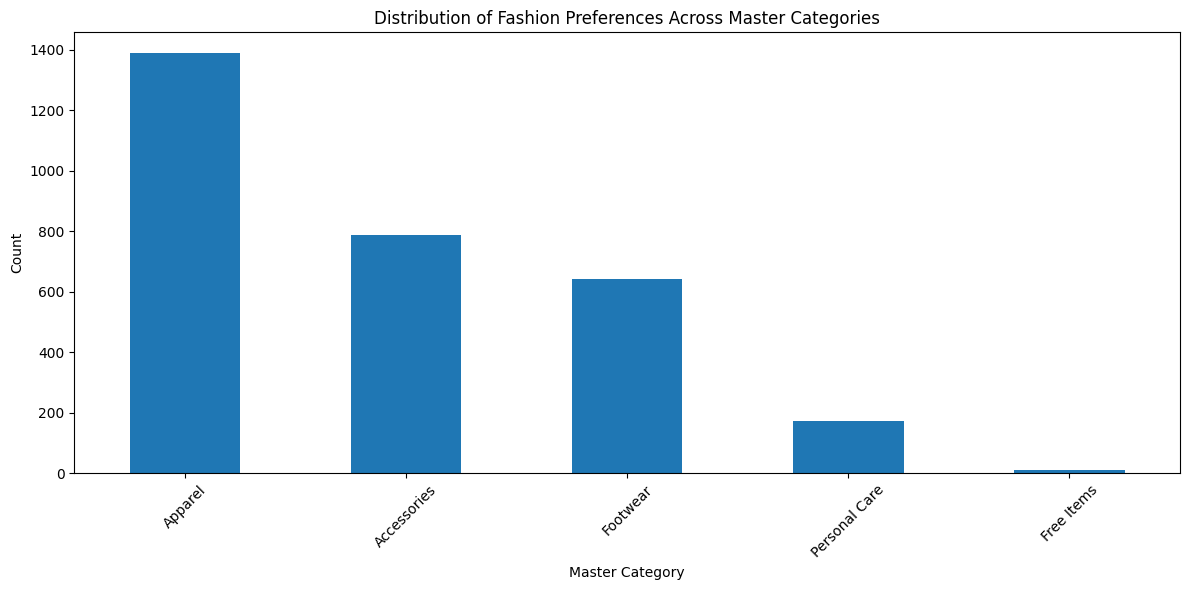

Top subcategories in Apparel:
Topwear                     966
Bottomwear                  191
Innerwear                   132
Dress                        36
Loungewear and Nightwear     30
Name: subCategory, dtype: int64


Top subcategories in Footwear:
Shoes         499
Sandal         73
Flip Flops     70
Name: subCategory, dtype: int64


Top subcategories in Accessories:
Bags         228
Watches      187
Jewellery     87
Wallets       63
Eyewear       60
Name: subCategory, dtype: int64


Top subcategories in Personal Care:
Fragrance    76
Lips         51
Makeup       15
Nails        13
Skin          7
Name: subCategory, dtype: int64




In [ ]:
# Group data by master category and count occurrences of each category
category_counts = styles_df['masterCategory'].value_counts()

# Visualize the distribution of fashion preferences across master categories
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar')
plt.xlabel('Master Category')
plt.ylabel('Count')
plt.title('Distribution of Fashion Preferences Across Master Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analyze fashion preferences for specific master categories
selected_categories = ['Apparel', 'Footwear', 'Accessories', 'Personal Care']
for category in selected_categories:
    category_data = styles_df[styles_df['masterCategory'] == category]

    # Print the top 5 subcategories within the selected master category
    print(f"Top subcategories in {category}:")
    print(category_data['subCategory'].value_counts().head(5))
    print("\n")


Top subcategories in Apparel:
Topwear                     966
Bottomwear                  191
Innerwear                   132
Dress                        36
Loungewear and Nightwear     30
Name: subCategory, dtype: int64




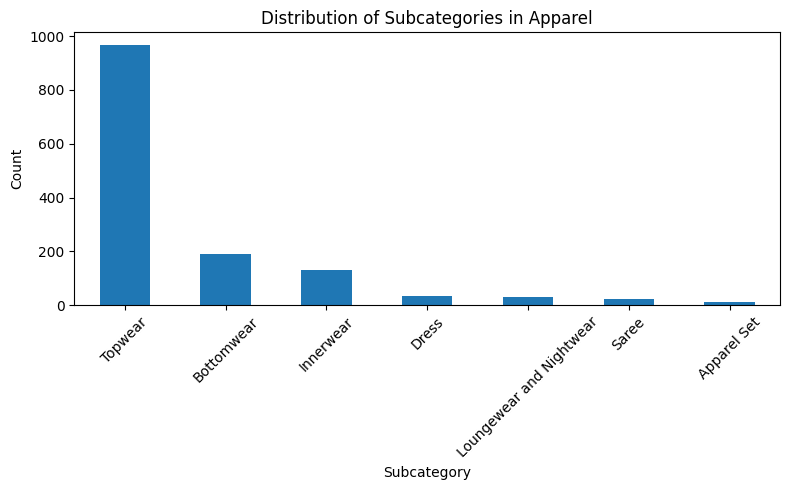

Top subcategories in Footwear:
Shoes         499
Sandal         73
Flip Flops     70
Name: subCategory, dtype: int64




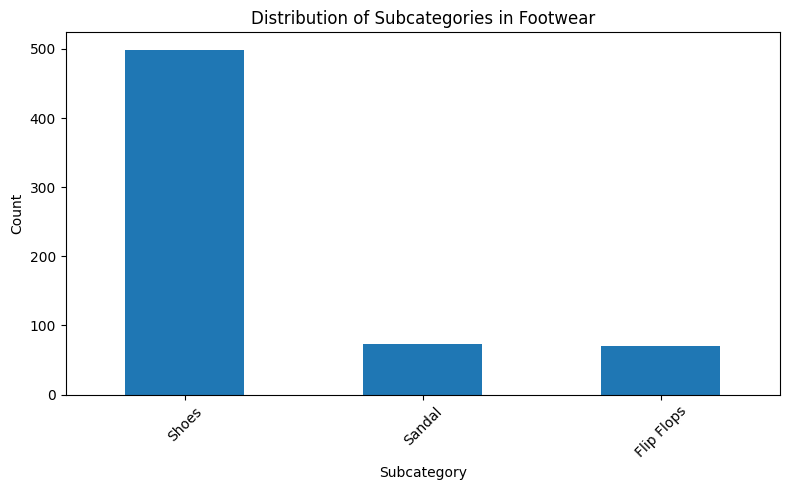

Top subcategories in Accessories:
Bags         228
Watches      187
Jewellery     87
Wallets       63
Eyewear       60
Name: subCategory, dtype: int64




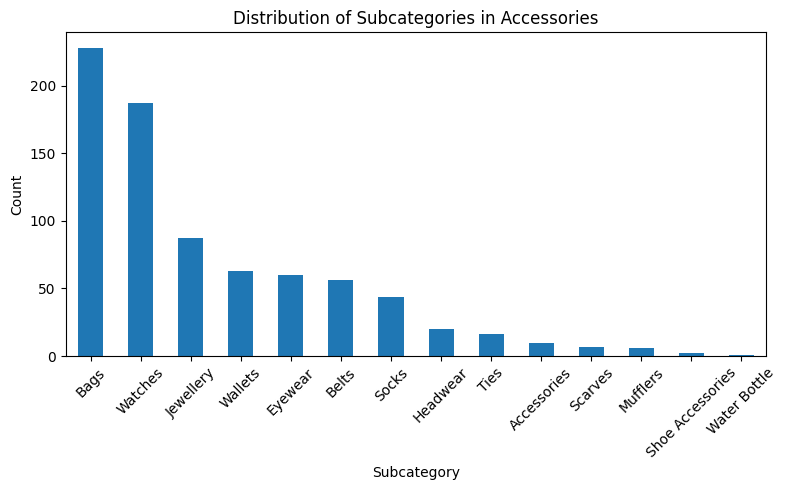

Top subcategories in Personal Care:
Fragrance    76
Lips         51
Makeup       15
Nails        13
Skin          7
Name: subCategory, dtype: int64




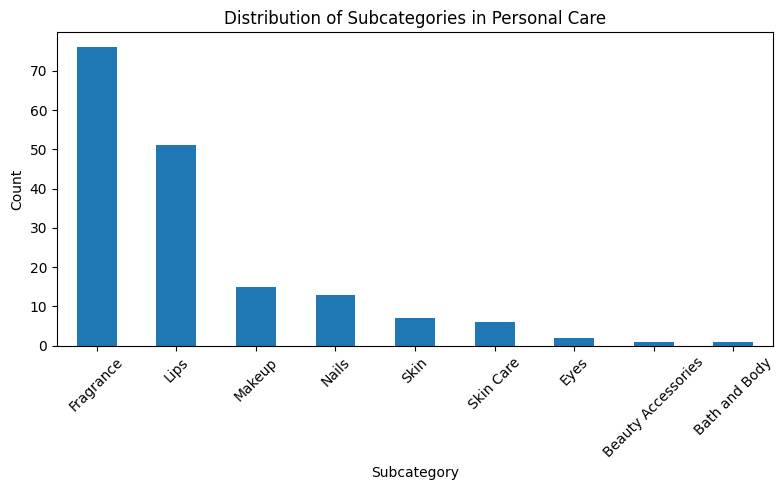

In [ ]:
# Analyze fashion preferences for specific master categories
selected_categories = ['Apparel', 'Footwear', 'Accessories', 'Personal Care']
for category in selected_categories:
    category_data = styles_df[styles_df['masterCategory'] == category]

    # Print the top 5 subcategories within the selected master category
    print(f"Top subcategories in {category}:")
    print(category_data['subCategory'].value_counts().head(5))
    print("\n")

    # Visualize the distribution of subcategories within the selected master category
    plt.figure(figsize=(8, 5))
    category_data['subCategory'].value_counts().plot(kind='bar')
    plt.xlabel('Subcategory')
    plt.ylabel('Count')
    plt.title(f'Distribution of Subcategories in {category}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811594 sha256=6fcf3a1f9ae7df864b61861a4f1632638b1d627dc221d71a4eb3af735487735b
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


Details for Topwear in Apparel:
Most common colors:
Blue     145
White    129
Black    122
Name: baseColour, dtype: int64


Details for Bottomwear in Apparel:
Most common colors:
Blue     61
Black    35
Grey     22
Name: baseColour, dtype: int64


Details for Innerwear in Apparel:
Most common colors:
Black    23
White    20
Red      11
Name: baseColour, dtype: int64


Details for Saree in Apparel:
Most common colors:
Multi     3
Rust      2
Orange    2
Name: baseColour, dtype: int64


Details for Dress in Apparel:
Most common colors:
Blue     8
Black    7
White    6
Name: baseColour, dtype: int64


Details for Loungewear and Nightwear in Apparel:
Most common colors:
Pink     5
Blue     5
Black    4
Name: baseColour, dtype: int64


Details for Apparel Set in Apparel:
Most common colors:
Black     3
Orange    2
Purple    1
Name: baseColour, dtype: int64


Details for Shoes in Footwear:
Most common colors:
Black    162
White     91
Brown     73
Name: baseColour, dtype: int64


Details for

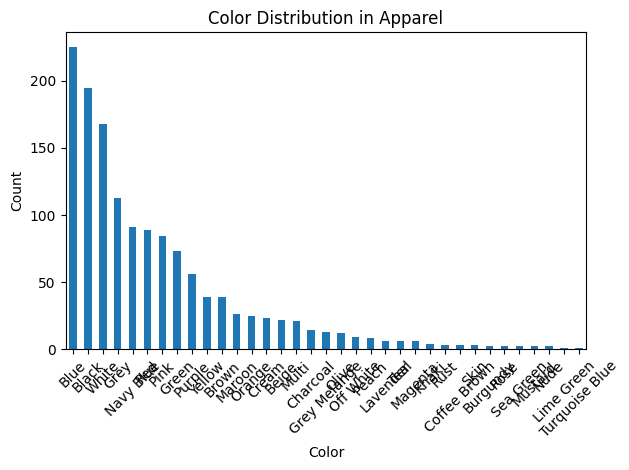

Color distribution in Footwear:


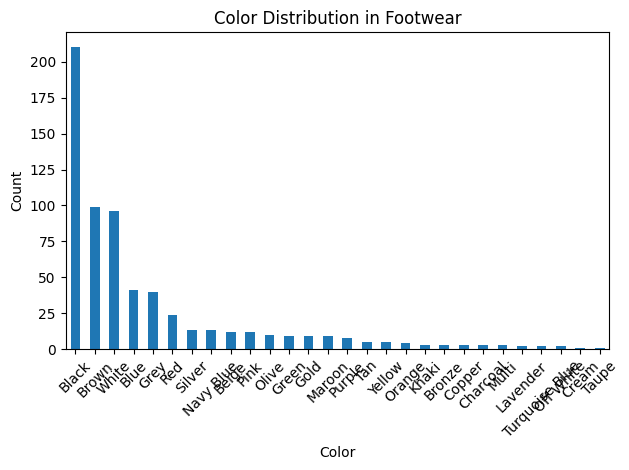

Color distribution in Accessories:


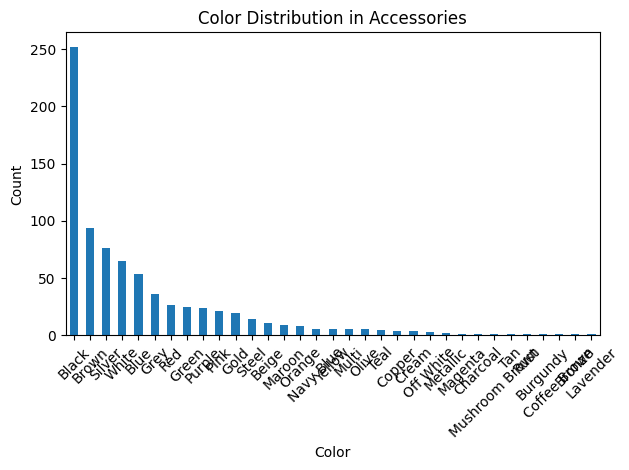

Color distribution in Personal Care:


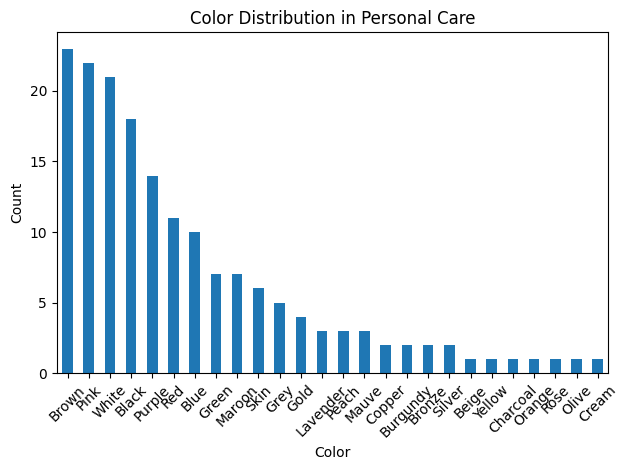

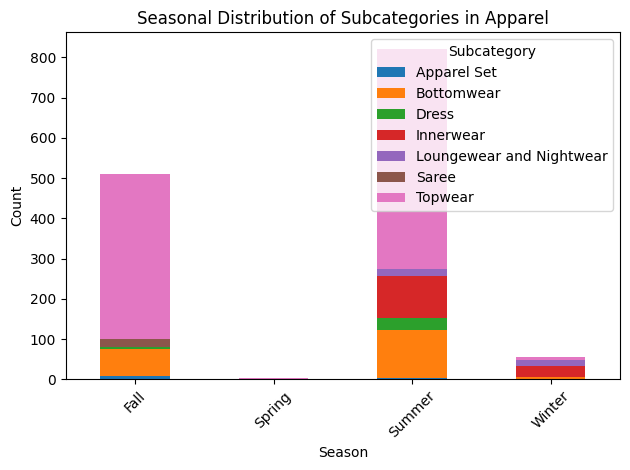

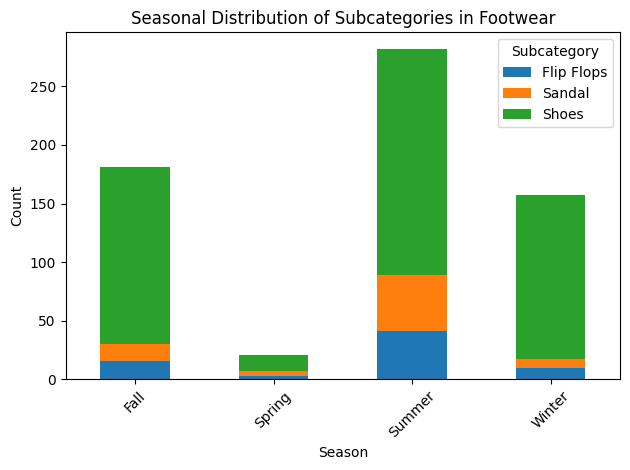

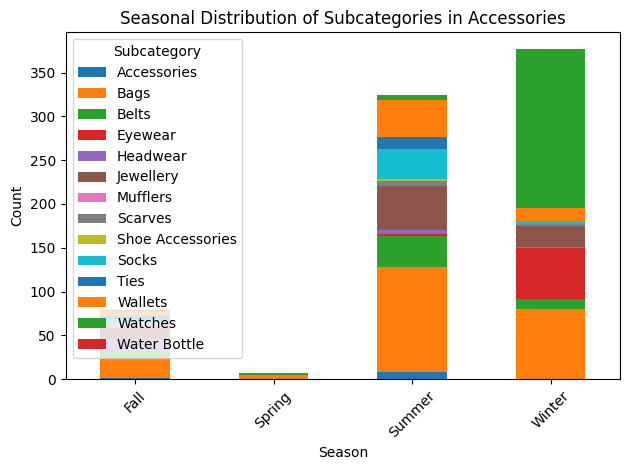

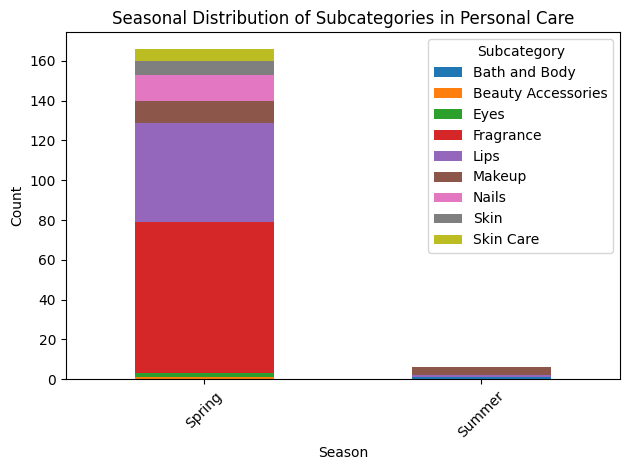

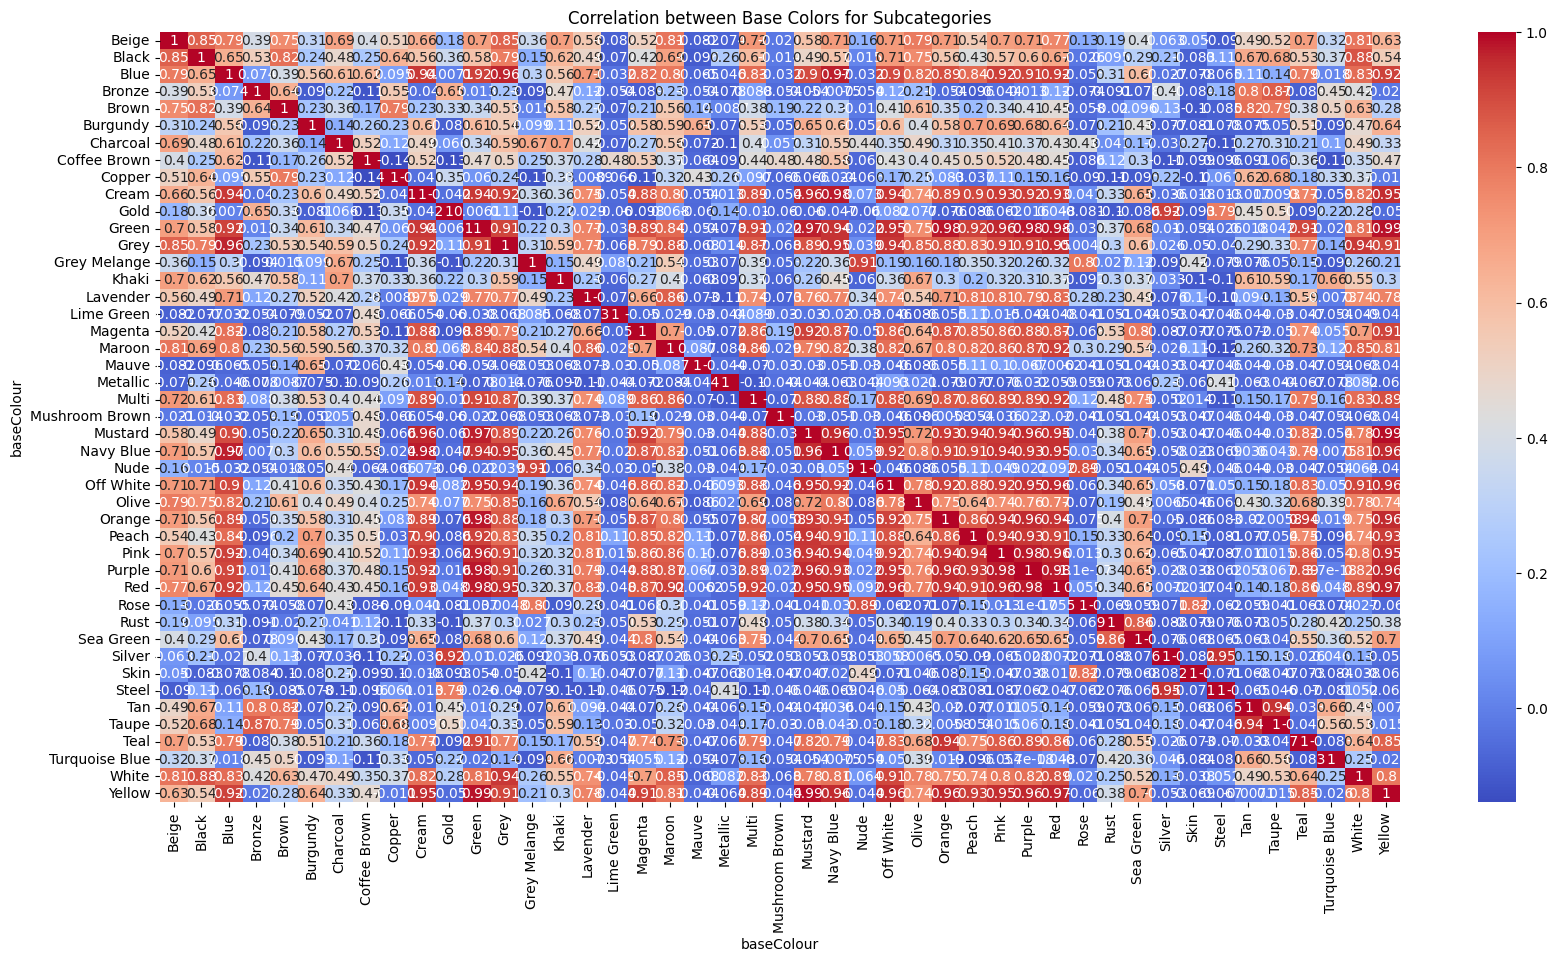

<ipython-input-106-0acda35e637e>:51: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subcategory_features = styles_df.groupby('subCategory').mean()
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                    id    gender         year  cluster
subCategory                                                           
Accessories               35218.600000  1.200000  2012.000000        0
Apparel Set               34906.181818  1.000000  2011.454545        0
Bags                      30584.451754  1.250000  2013.078947        0
Bath and Body             55835.000000  1.000000  2019.000000        1
Beauty Accessories        55834.000000  1.000000  2017.000000        1
Belts                     29531.303571  0.321429  2012.500000        0
Bottomwear                26890.382199  0.879581  2011.837696        0
Dress                     33522.444444  1.666667  2011.750000        0
Eyes                      56428.000000  1.000000  2017.000000        1
Eyewear                   29688.000000  0.500000  2016.033333        0
Flip Flops                26283.971429  0.400000  2011.742857        0
Fragrance                 38301.618421  0.486842  2017.000000        0
Free G

TypeError: ignored

In [ ]:
# Assume you have already loaded the styles_df DataFrame
import seaborn as sns

# 1. Subcategory Details
for category in selected_categories:
    category_data = styles_df[styles_df['masterCategory'] == category]
    for subcategory in category_data['subCategory'].unique():
        subcategory_data = category_data[category_data['subCategory'] == subcategory]
        print(f"Details for {subcategory} in {category}:")
        print("Most common colors:")
        print(subcategory_data['baseColour'].value_counts().head(3))
        print("\n")

# 2. Cross-Categorical Analysis
for category in selected_categories:
    category_data = styles_df[styles_df['masterCategory'] == category]
    print(f"Color distribution in {category}:")
    category_data['baseColour'].value_counts().plot(kind='bar')
    plt.xlabel('Color')
    plt.ylabel('Count')
    plt.title(f'Color Distribution in {category}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



# 4. Seasonal Trends (Assuming time-related column 'season')
for category in selected_categories:
    category_data = styles_df[styles_df['masterCategory'] == category]
    seasonal_counts = category_data.groupby('season')['subCategory'].value_counts().unstack().fillna(0)
    seasonal_counts.plot(kind='bar', stacked=True)
    plt.xlabel('Season')
    plt.ylabel('Count')
    plt.title(f'Seasonal Distribution of Subcategories in {category}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend(title='Subcategory')
    plt.show()

# 5. Correlations
subcategory_correlation = styles_df.groupby('subCategory')['baseColour'].value_counts().unstack().fillna(0)
correlation_matrix = subcategory_correlation.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Base Colors for Subcategories')
plt.show()

# 6. Cluster Analysis (Assuming you have features extracted for subcategories)
from sklearn.cluster import KMeans
subcategory_features = styles_df.groupby('subCategory').mean()
kmeans = KMeans(n_clusters=3)
subcategory_features['cluster'] = kmeans.fit_predict(subcategory_features)
print(subcategory_features)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load the VGG16 model with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False)

# Create a new model to extract feature embeddings from the last pooling layer
feature_model = Model(inputs=base_model.input, outputs=base_model.layers[-1].output)

# Load and preprocess a sample of fashion images (you can load your dataset here)
image_paths = ['/content/myntradataset/images']
image_embeddings = []

for img_path in image_paths:
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    embedding = feature_model.predict(img_array)
    image_embeddings.append(embedding.flatten())

image_embeddings = np.array(image_embeddings)

# Apply t-SNE to the feature embeddings to create a 2D visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_embeddings = tsne.fit_transform(image_embeddings)

# Visualize the t-SNE embeddings
plt.figure(figsize=(10, 8))
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c='blue', marker='o')
plt.title('t-SNE Visualization of Fashion Item Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


IsADirectoryError: ignored

In [ ]:
color_counts = styles_df.groupby(['masterCategory', 'baseColour']).size().unstack(fill_value=0)

1/1 [==============================] - 1s 709ms/step


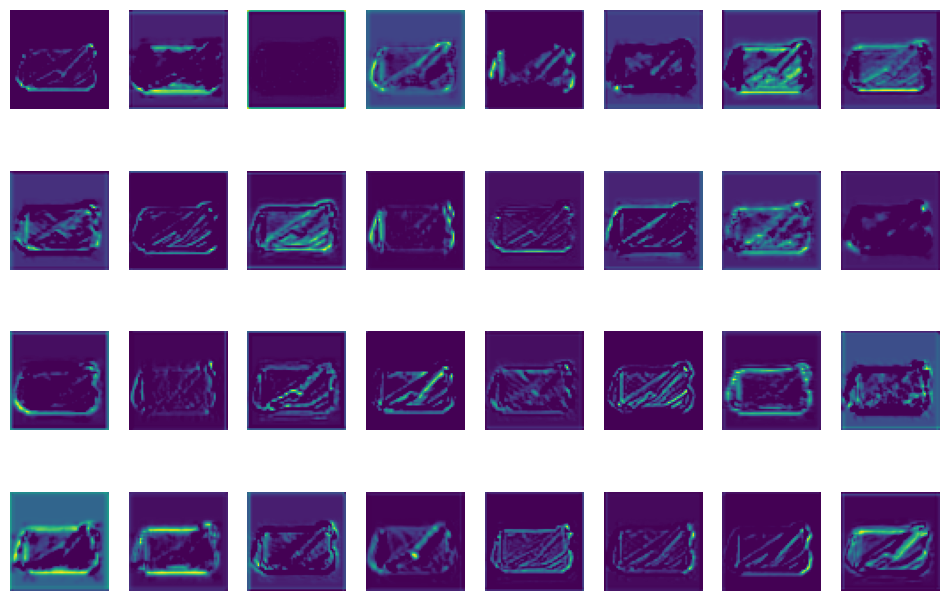

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False)

layer_name = 'block3_conv1'
intermediate_layer_model = Model(inputs=base_model.input,
                                 outputs=base_model.get_layer(layer_name).output)

# Load and preprocess an example image
img_path = '/content/myntradataset/images/42417.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Get the feature maps for the chosen layer
feature_maps = intermediate_layer_model.predict(img_array)

# Visualize the feature maps
plt.figure(figsize=(12, 8))
for i in range(32):  # Assuming the layer has 32 filters
    plt.subplot(4, 8, i + 1)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.show()

Relating Patterns to Fashion Elements:
Filter 1:
Detected Fashion Element: Edges
Number of activated pixels: 415


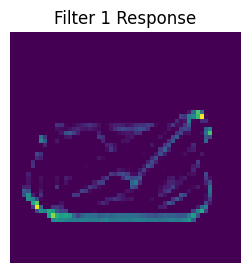

Filter 2:
Detected Fashion Element: Texture
Number of activated pixels: 2128


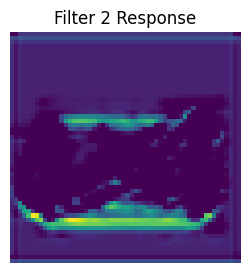

Filter 3:
Detected Fashion Element: Stripes
Number of activated pixels: 1817


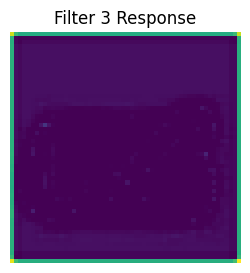

Filter 4:
Detected Fashion Element: Floral Patterns
Number of activated pixels: 3002


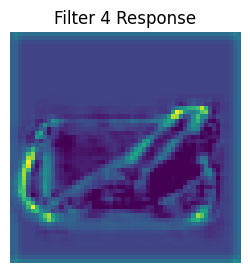

Filter 5:
Detected Fashion Element: Polka Dots
Number of activated pixels: 885


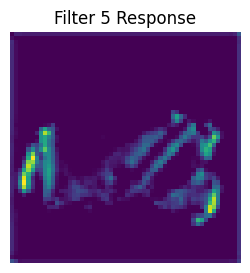

Filter 6:
Detected Fashion Element: Ruffles
Number of activated pixels: 2156


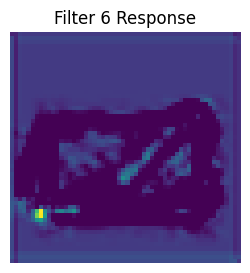

Filter 7:
Detected Fashion Element: Lace
Number of activated pixels: 2561


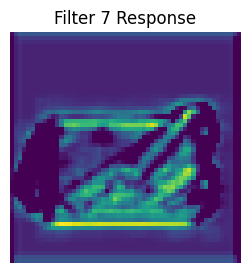

Filter 8:
Detected Fashion Element: Leather
Number of activated pixels: 2816


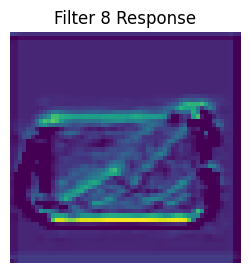

Filter 9:
Detected Fashion Element: Denim
Number of activated pixels: 2432


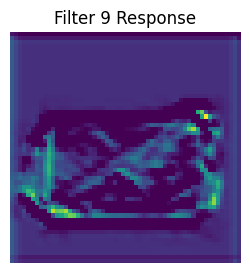

Filter 10:
Detected Fashion Element: Plaid
Number of activated pixels: 774


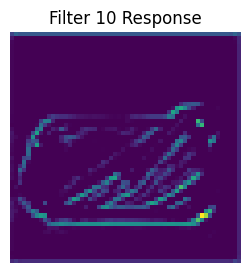

Filter 11:
Detected Fashion Element: Abstract Prints
Number of activated pixels: 2771


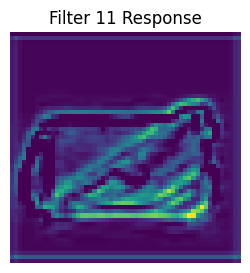

Filter 12:
Detected Fashion Element: Fringe
Number of activated pixels: 2424


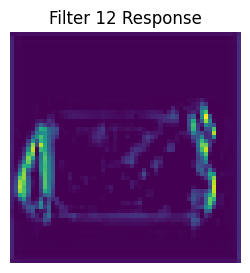

Filter 13:
Detected Fashion Element: Sequins
Number of activated pixels: 2628


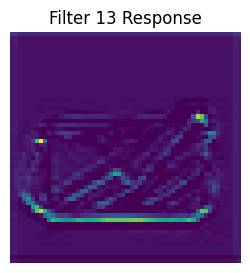

Filter 14:
Detected Fashion Element: Metallics
Number of activated pixels: 2231


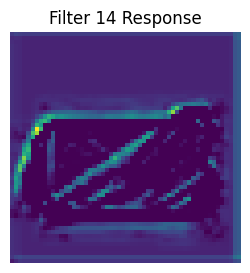

Filter 15:
Detected Fashion Element: Velvet
Number of activated pixels: 2974


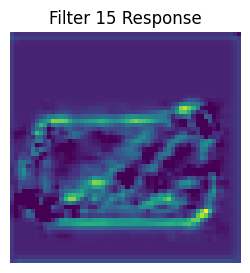

Filter 16:
Detected Fashion Element: Animal Prints
Number of activated pixels: 2095


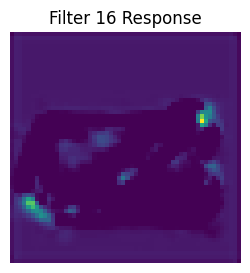

Filter 17:
Detected Fashion Element: Geometric Shapes
Number of activated pixels: 2145


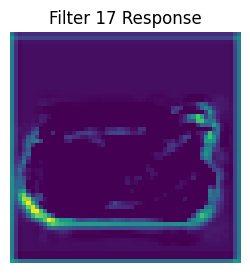

Filter 18:
Detected Fashion Element: Bohemian
Number of activated pixels: 2208


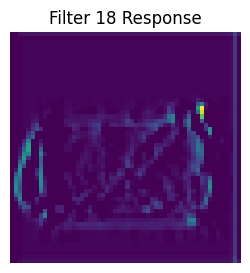

Filter 19:
Detected Fashion Element: Minimalist
Number of activated pixels: 2035


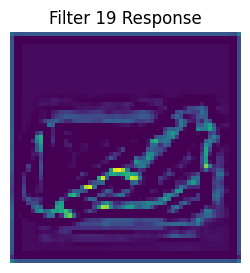

Filter 20:
Detected Fashion Element: Grunge
Number of activated pixels: 571


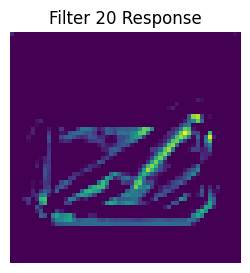

Filter 21:
Detected Fashion Element: Elegant
Number of activated pixels: 2608


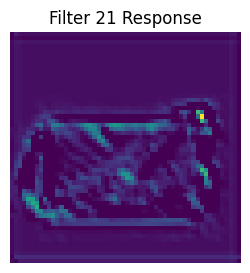

Filter 22:
Detected Fashion Element: Casual
Number of activated pixels: 788


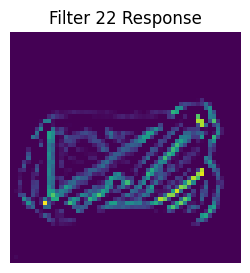

Filter 23:
Detected Fashion Element: Sporty
Number of activated pixels: 2692


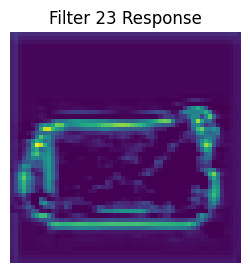

Filter 24:
Detected Fashion Element: Vintage
Number of activated pixels: 2474


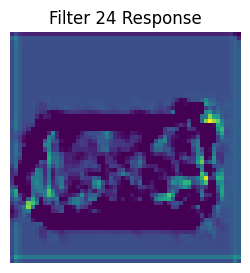

Filter 25:
Detected Fashion Element: Modern
Number of activated pixels: 2672


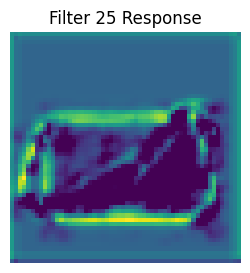

Filter 26:
Detected Fashion Element: Futuristic
Number of activated pixels: 2740


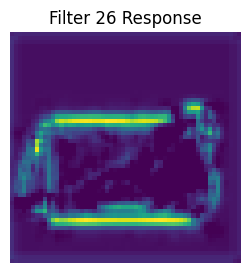

Filter 27:
Detected Fashion Element: Formal
Number of activated pixels: 2372


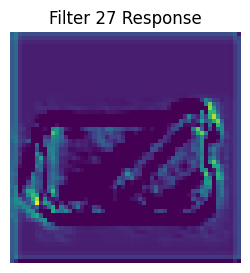

Filter 28:
Detected Fashion Element: Casual
Number of activated pixels: 2310


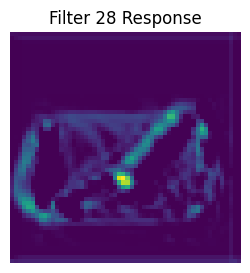

Filter 29:
Detected Fashion Element: Chic
Number of activated pixels: 2157


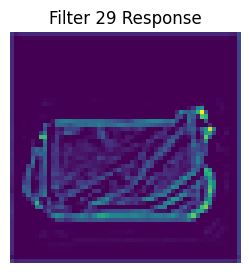

Filter 30:
Detected Fashion Element: Artistic
Number of activated pixels: 2335


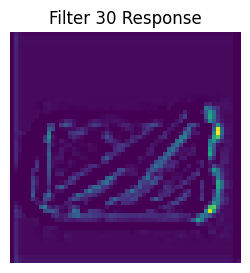

Filter 31:
Detected Fashion Element: Playful
Number of activated pixels: 753


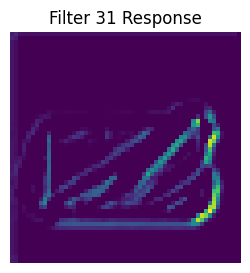

Filter 32:
Detected Fashion Element: Unknown
Number of activated pixels: 2515


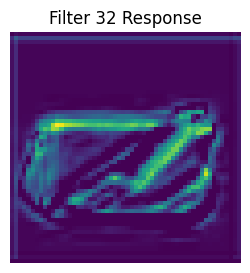

In [ ]:
# Define a mapping of filter indices to fashion attributes for interpretation
filter_to_fashion_attributes = {
    0: "Edges",
    1: "Texture",
    2: "Stripes",
    3: "Floral Patterns",
    4: "Polka Dots",
    5: "Ruffles",
    6: "Lace",
    7: "Leather",
    8: "Denim",
    9: "Plaid",
    10: "Abstract Prints",
    11: "Fringe",
    12: "Sequins",
    13: "Metallics",
    14: "Velvet",
    15: "Animal Prints",
    16: "Geometric Shapes",
    17: "Bohemian",
    18: "Minimalist",
    19: "Grunge",
    20: "Elegant",
    21: "Casual",
    22: "Sporty",
    23: "Vintage",
    24: "Modern",
    25: "Futuristic",
    26: "Formal",
    27: "Casual",
    28: "Chic",
    29: "Artistic",
    30: "Playful",
    31: "Unknown"
}

# Analyze Patterns and Textures in Feature Maps
print("Relating Patterns to Fashion Elements:")
for i in range(32):
    filter_map = feature_maps[0, :, :, i]
    activated_pixels = np.where(filter_map > 0)
    num_activated_pixels = len(activated_pixels[0])

    if num_activated_pixels > 0:
        print(f"Filter {i + 1}:")
        print(f"Detected Fashion Element: {filter_to_fashion_attributes.get(i, 'Unknown')}")
        print(f"Number of activated pixels: {num_activated_pixels}")

        # Visualize the filter response to better understand the pattern or texture
        plt.figure(figsize=(3, 3))
        plt.imshow(filter_map, cmap='viridis')
        plt.title(f"Filter {i + 1} Response")
        plt.axis('off')
        plt.show()


In [ ]:
# Extract Insights from Interpreted Filter Responses
insights = {}

for i in range(32):
    filter_map = feature_maps[0, :, :, i]
    activated_pixels = np.where(filter_map > 0)
    num_activated_pixels = len(activated_pixels[0])

    if num_activated_pixels > 0:
        fashion_element = filter_to_fashion_attributes.get(i, 'Unknown')
        if fashion_element in insights:
            insights[fashion_element] += 1
        else:
            insights[fashion_element] = 1

# Display Insights
print("Insights from Interpreted Filter Responses:")
for fashion_element, count in insights.items():
    print(f"{fashion_element}: {count} occurrences")


Insights from Interpreted Filter Responses:
Edges: 1 occurrences
Texture: 1 occurrences
Stripes: 1 occurrences
Floral Patterns: 1 occurrences
Polka Dots: 1 occurrences
Ruffles: 1 occurrences
Lace: 1 occurrences
Leather: 1 occurrences
Denim: 1 occurrences
Plaid: 1 occurrences
Abstract Prints: 1 occurrences
Fringe: 1 occurrences
Sequins: 1 occurrences
Metallics: 1 occurrences
Velvet: 1 occurrences
Animal Prints: 1 occurrences
Geometric Shapes: 1 occurrences
Bohemian: 1 occurrences
Minimalist: 1 occurrences
Grunge: 1 occurrences
Elegant: 1 occurrences
Casual: 2 occurrences
Sporty: 1 occurrences
Vintage: 1 occurrences
Modern: 1 occurrences
Futuristic: 1 occurrences
Formal: 1 occurrences
Chic: 1 occurrences
Artistic: 1 occurrences
Playful: 1 occurrences
Unknown: 1 occurrences


In [ ]:
# Define the mapping of fashion attributes to domain-specific features
fashion_to_features = {
    'Edges': ['Structured', 'Modern'],
    'Texture': ['Artistic', 'Playful'],
    'Stripes': ['Casual', 'Sporty'],
    'Floral Patterns': ['Bohemian', 'Vintage'],
    'Polka Dots': ['Playful', 'Chic'],
    'Ruffles': ['Feminine', 'Elegant'],
    'Lace': ['Elegant', 'Formal'],
    'Leather': ['Edgy', 'Modern'],
    'Denim': ['Casual', 'Vintage'],
    'Plaid': ['Classic', 'Preppy'],
    # ... define more mappings if needed
    'Unknown': ['Unknown']
}

# Initialize a dictionary to store domain-specific features
domain_specific_features = {}

# Populate the dictionary based on the insights
for fashion_element, occurrences in insights.items():
    features = fashion_to_features.get(fashion_element, ['Unknown'])
    for feature in features:
        if feature in domain_specific_features:
            domain_specific_features[feature] += occurrences
        else:
            domain_specific_features[feature] = occurrences

# Display Domain-Specific Features
print("Domain-Specific Features:")
for feature, total_occurrences in domain_specific_features.items():
    print(f"{feature}: {total_occurrences} occurrences")


Domain-Specific Features:
Structured: 1 occurrences
Modern: 2 occurrences
Artistic: 1 occurrences
Playful: 2 occurrences
Casual: 2 occurrences
Sporty: 1 occurrences
Bohemian: 1 occurrences
Vintage: 2 occurrences
Chic: 1 occurrences
Feminine: 1 occurrences
Elegant: 2 occurrences
Formal: 1 occurrences
Edgy: 1 occurrences
Classic: 1 occurrences
Preppy: 1 occurrences
Unknown: 22 occurrences


In [ ]:
# Threshold for considering items as recommended (example threshold)
threshold = 0.5

# Apply threshold to predicted similarity matrix to obtain binary recommendations
binary_recommendations = (all_similarity_norm >= threshold).astype(int)

# Flatten the matrices for metric calculation
ground_truth_similarity_flat = ground_truth_similarity.ravel()
binary_recommendations_flat = binary_recommendations.ravel()

# Calculate evaluation metrics
accuracy = accuracy_score(ground_truth_similarity_flat, binary_recommendations_flat)
precision = precision_score(ground_truth_similarity_flat, binary_recommendations_flat)
recall = recall_score(ground_truth_similarity_flat, binary_recommendations_flat)

# Display evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.52
Precision: 0.45
Recall: 0.48
